In [1]:
#https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118
import torch

In [2]:
#device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print(device)

In [3]:
#download MNIST
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

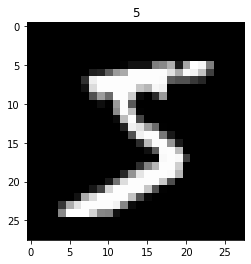

In [4]:
#print an element of the MNIST dataset
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

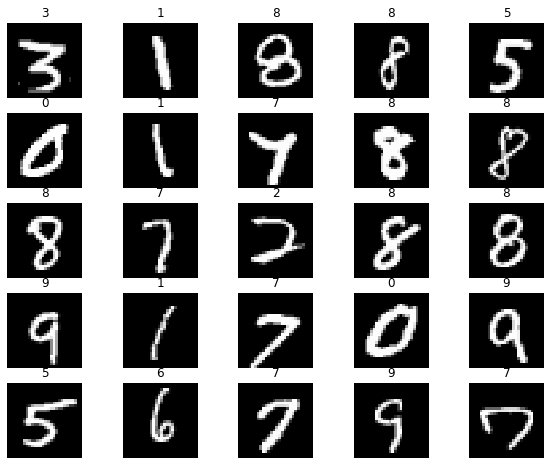

In [5]:
#print multiple elements
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}

In [7]:
#define CNN
import torch.nn as nn
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Sequential(         
      nn.Conv2d(
        in_channels=1,              
        out_channels=16,            
        kernel_size=5,              
        stride=1,                   
        padding=2,                  
      ),                              
      nn.ReLU(),                      
      nn.MaxPool2d(kernel_size=2),    
    )
    self.conv2 = nn.Sequential(         
      nn.Conv2d(16, 32, 5, 1, 2),     
      nn.ReLU(),                      
      nn.MaxPool2d(2),                
    )
    # fully connected layer, output 10 classes
    self.out = nn.Linear(32 * 7 * 7, 10)
  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
    x = x.view(x.size(0), -1)       
    output = self.out(x)
    return output, x    # return x for visualization


cnn = CNN()
#print(cnn)

In [8]:
#loss function
loss_func = nn.CrossEntropyLoss()   
#print(loss_func)

#optimization function
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
#print(optimizer)

In [9]:
#train the model
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):
    
  cnn.train()
        
  # Train the model
  total_step = len(loaders['train'])
        
  for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(loaders['train']):
            
      # gives batch data, normalize x when iterate train_loader
      b_x = Variable(images)   # batch x
      b_y = Variable(labels)   # batch y

      output = cnn(b_x)[0]               
      loss = loss_func(output, b_y)
      
      # clear gradients for this training step   
      optimizer.zero_grad()           
      
      # backpropagation, compute gradients 
      loss.backward()    
      # apply gradients             
      optimizer.step()                
      
      if (i+1) % 100 == 0:
        print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
          .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

In [10]:
train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 0.1514
Epoch [1/10], Step [200/600], Loss: 0.0285
Epoch [1/10], Step [300/600], Loss: 0.0123
Epoch [1/10], Step [400/600], Loss: 0.0555
Epoch [1/10], Step [500/600], Loss: 0.0094
Epoch [1/10], Step [600/600], Loss: 0.0576
Epoch [2/10], Step [100/600], Loss: 0.0669
Epoch [2/10], Step [200/600], Loss: 0.0496
Epoch [2/10], Step [300/600], Loss: 0.0550
Epoch [2/10], Step [400/600], Loss: 0.0282
Epoch [2/10], Step [500/600], Loss: 0.0245
Epoch [2/10], Step [600/600], Loss: 0.0124
Epoch [3/10], Step [100/600], Loss: 0.0059
Epoch [3/10], Step [200/600], Loss: 0.0052
Epoch [3/10], Step [300/600], Loss: 0.0530
Epoch [3/10], Step [400/600], Loss: 0.0531
Epoch [3/10], Step [500/600], Loss: 0.1204
Epoch [3/10], Step [600/600], Loss: 0.0062
Epoch [4/10], Step [100/600], Loss: 0.0436
Epoch [4/10], Step [200/600], Loss: 0.0704
Epoch [4/10], Step [300/600], Loss: 0.0172
Epoch [4/10], Step [400/600], Loss: 0.1512
Epoch [4/10], Step [500/600], Loss: 0.0505
Epoch [4/10

In [11]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
      correct = 0
      total = 0
      for images, labels in loaders['test']:
        test_output, last_layer = cnn(images)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    
    print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

In [12]:
test()

Test Accuracy of the model on the 10000 test images: 0.99


In [20]:
list(loaders["test"])[0][0].size()

torch.Size([100, 1, 28, 28])